
## Necessary Lighbary



In [1]:
########### This is only need for  google colab ##############
##############################################################

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2023-04-09 14:54:44--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-04-09 14:54:44--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-04-09 14:54:44--  http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving gigenet.dl.sour

In [2]:
import sqlite3
import pandas as pd
import talib
import numpy as np

In [4]:
import matplotlib.pyplot as plt

## Database Connection for local pc

In [5]:
# connection = sqlite3.connect(r"cripto.db")
# connection = sqlite3.connect(r"../database/big_data.db")
# cur = connection.cursor()
# database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Database Connection for google colab


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
connection = sqlite3.connect(r"/content/drive/My Drive/Data/big_data.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [10]:
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,742859,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.661659e+12,1.894831e+05,441.0,6.187260,1661658480
1,742483,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,1.661636e+12,5.658343e+04,173.0,0.973320,1661635920
2,743891,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,1.661720e+12,5.180279e+05,642.0,17.762630,1661720400
3,576835,BTCBUSD,39858.07,39858.07,39853.57,39858.03,1.005430,-0.000100356088493179,1.651697e+12,4.007142e+04,89.0,0.707620,1651697040
4,66429,BTCBUSD,49822.29,49860.68,49803.54,49822.24,7.058411,-0.000100356687745405,1.621049e+12,3.517801e+05,238.0,3.036725,1621049280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,799746,BTCBUSD,20099.98,20111.00,20090.47,20100.00,72.755640,9.95025865719098e-05,1.665072e+12,1.462424e+06,1169.0,35.556670,1665071700
1035983,550782,BTCBUSD,40154.99,40165.00,40154.99,40155.03,0.414450,9.96140205759561e-05,1.650134e+12,1.664380e+04,64.0,0.109080,1650133860
1035984,470452,BTCBUSD,40089.28,40097.68,40089.28,40089.32,0.367120,9.97772970751111e-05,1.645314e+12,1.471828e+04,42.0,0.089730,1645314060
1035985,595522,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,1.652818e+12,5.237727e+04,94.0,0.921370,1652818260


## Name Columns

In [11]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime','VolumeBUSD', 'Trades', 'BuyQuoteVolume', 'Time']
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,742859,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.661659e+12,1.894831e+05,441.0,6.187260,1661658480
1,742483,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,1.661636e+12,5.658343e+04,173.0,0.973320,1661635920
2,743891,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,1.661720e+12,5.180279e+05,642.0,17.762630,1661720400
3,576835,BTCBUSD,39858.07,39858.07,39853.57,39858.03,1.005430,-0.000100356088493179,1.651697e+12,4.007142e+04,89.0,0.707620,1651697040
4,66429,BTCBUSD,49822.29,49860.68,49803.54,49822.24,7.058411,-0.000100356687745405,1.621049e+12,3.517801e+05,238.0,3.036725,1621049280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,799746,BTCBUSD,20099.98,20111.00,20090.47,20100.00,72.755640,9.95025865719098e-05,1.665072e+12,1.462424e+06,1169.0,35.556670,1665071700
1035983,550782,BTCBUSD,40154.99,40165.00,40154.99,40155.03,0.414450,9.96140205759561e-05,1.650134e+12,1.664380e+04,64.0,0.109080,1650133860
1035984,470452,BTCBUSD,40089.28,40097.68,40089.28,40089.32,0.367120,9.97772970751111e-05,1.645314e+12,1.471828e+04,42.0,0.089730,1645314060
1035985,595522,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,1.652818e+12,5.237727e+04,94.0,0.921370,1652818260


# Make a Candle plot

In [12]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,,
2022-08-28 03:48:59.999000064,742859,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.894831e+05,441.0,6.187260,1661658480
2022-08-27 21:32:59.999000064,742483,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,5.658343e+04,173.0,0.973320,1661635920
2022-08-28 21:00:59.999000064,743891,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,5.180279e+05,642.0,17.762630,1661720400
2022-05-04 20:44:59.999000064,576835,BTCBUSD,39858.07,39858.07,39853.57,39858.03,1.005430,-0.000100356088493179,4.007142e+04,89.0,0.707620,1651697040
2021-05-15 03:28:59.999000064,66429,BTCBUSD,49822.29,49860.68,49803.54,49822.24,7.058411,-0.000100356687745405,3.517801e+05,238.0,3.036725,1621049280
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-06 15:55:59.999000064,799746,BTCBUSD,20099.98,20111.00,20090.47,20100.00,72.755640,9.95025865719098e-05,1.462424e+06,1169.0,35.556670,1665071700
2022-04-16 18:31:59.999000064,550782,BTCBUSD,40154.99,40165.00,40154.99,40155.03,0.414450,9.96140205759561e-05,1.664380e+04,64.0,0.109080,1650133860
2022-02-19 23:41:59.999000064,470452,BTCBUSD,40089.28,40097.68,40089.28,40089.32,0.367120,9.97772970751111e-05,1.471828e+04,42.0,0.089730,1645314060


# Make a Custom Pattern

In [13]:
df = df.reset_index(drop=True)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,742859,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.894831e+05,441.0,6.187260,1661658480
1,742483,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,5.658343e+04,173.0,0.973320,1661635920
2,743891,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,5.180279e+05,642.0,17.762630,1661720400
3,576835,BTCBUSD,39858.07,39858.07,39853.57,39858.03,1.005430,-0.000100356088493179,4.007142e+04,89.0,0.707620,1651697040
4,66429,BTCBUSD,49822.29,49860.68,49803.54,49822.24,7.058411,-0.000100356687745405,3.517801e+05,238.0,3.036725,1621049280
...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,799746,BTCBUSD,20099.98,20111.00,20090.47,20100.00,72.755640,9.95025865719098e-05,1.462424e+06,1169.0,35.556670,1665071700
1035983,550782,BTCBUSD,40154.99,40165.00,40154.99,40155.03,0.414450,9.96140205759561e-05,1.664380e+04,64.0,0.109080,1650133860
1035984,470452,BTCBUSD,40089.28,40097.68,40089.28,40089.32,0.367120,9.97772970751111e-05,1.471828e+04,42.0,0.089730,1645314060
1035985,595522,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,5.237727e+04,94.0,0.921370,1652818260


# Calculating RSI

In [14]:
df['rsi'] = talib.RSI(df['Close'], timeperiod=5)

# Generate signals
df['rsisignal'] = 0
df.loc[df['rsi'] > 70, 'rsisignal'] = -100
df.loc[df['rsi'] < 30, 'rsisignal'] = 100

print(df['rsisignal'].to_string())


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Addig candlestick patterns

In [15]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[0          0
1          0
2          0
3          0
4          0
          ..
1035982    0
1035983    0
1035984    0
1035985    0
1035986    0
Length: 1035987, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1035982    0
1035983    0
1035984    0
1035985    0
1035986    0
Length: 1035987, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1035982    0
1035983    0
1035984    0
1035985    0
1035986    0
Length: 1035987, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1035982    0
1035983    0
1035984    0
1035985    0
1035986    0
Length: 1035987, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1035982    0
1035983    0
1035984    0
1035985    0
1035986    0
Length: 1035987, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1035982    0
1035983    0
1035984    0
1035985    0

In [16]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns['rsi'] = df['rsisignal']
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,rsi,Sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,500
1035983,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,100,0,0,0,0,500
1035984,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,-100,0,0,0,0,400
1035985,0,0,0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,500


In [17]:
df = df.drop(['Symbol', 'Id', 'Time'], axis=1)

## Combine two Dataframe

In [18]:
df = df.astype(float)

In [19]:
df = df.add(patterns, fill_value=0)
df

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,Close,High,Low,Open,Sum,Trades,VolumeBTC,VolumeBUSD,rsi,rsisignal
0,6.187260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19998.21,20002.69,19995.19,19998.23,0.0,441.0,9.474930,1.894831e+05,0.000000,0.0
1,0.973320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19997.00,19998.00,19997.00,19997.02,0.0,173.0,2.829590,5.658343e+04,0.000000,0.0
2,17.762630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19987.74,19998.62,19985.14,19987.76,0.0,642.0,25.911260,5.180279e+05,0.000000,0.0
3,0.707620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39858.03,39858.07,39853.57,39858.07,0.0,89.0,1.005430,4.007142e+04,0.000000,0.0
4,3.036725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49822.24,49860.68,49803.54,49822.29,0.0,238.0,7.058411,3.517801e+05,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,35.556670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20100.00,20111.00,20090.47,20099.98,500.0,1169.0,72.755640,1.462424e+06,38.955066,0.0
1035983,0.109080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40155.03,40165.00,40154.99,40154.99,500.0,64.0,0.414450,1.664380e+04,55.360821,0.0
1035984,0.089730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40089.32,40097.68,40089.28,40089.28,400.0,42.0,0.367120,1.471828e+04,55.299953,0.0
1035985,0.921370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30036.85,30036.85,30026.53,30036.82,500.0,94.0,1.743990,5.237727e+04,45.692957,0.0


## Make a plot to see the sum

0             0
1             0
2             0
3             0
4             0
           ... 
1035982    1000
1035983    1000
1035984     800
1035985    1000
1035986    1200
Length: 1035987, dtype: int64


<Axes: >

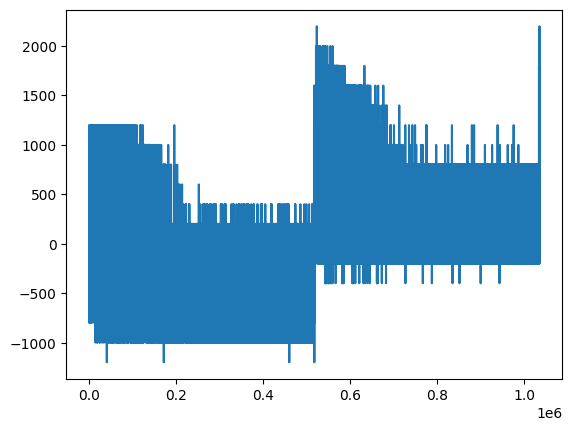

In [20]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

## X paramiter for feeding Model

In [21]:
X = df.drop(['Sum','rsi','rsisignal'], axis=1)
X

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Trades,VolumeBTC,VolumeBUSD
0,6.187260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,19998.21,20002.69,19995.19,19998.23,441.0,9.474930,1.894831e+05
1,0.973320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,19997.00,19998.00,19997.00,19997.02,173.0,2.829590,5.658343e+04
2,17.762630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,19987.74,19998.62,19985.14,19987.76,642.0,25.911260,5.180279e+05
3,0.707620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,39858.03,39858.07,39853.57,39858.07,89.0,1.005430,4.007142e+04
4,3.036725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,49822.24,49860.68,49803.54,49822.29,238.0,7.058411,3.517801e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,35.556670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0001,20100.00,20111.00,20090.47,20099.98,1169.0,72.755640,1.462424e+06
1035983,0.109080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0001,40155.03,40165.00,40154.99,40154.99,64.0,0.414450,1.664380e+04
1035984,0.089730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0001,40089.32,40097.68,40089.28,40089.28,42.0,0.367120,1.471828e+04
1035985,0.921370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0001,30036.85,30036.85,30026.53,30036.82,94.0,1.743990,5.237727e+04


## Y paramiter for feedind Model

In [22]:
y = df['Sum']
y

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
1035982    500.0
1035983    500.0
1035984    400.0
1035985    500.0
1035986    600.0
Name: Sum, Length: 1035987, dtype: float64

## Model for AI Research

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

## Use Tensorflow

In [24]:
X_train.shape

(932388, 70)

In [25]:
len(X_train)

932388

In [26]:
y_train.shape

(932388,)

In [27]:
import joblib

In [28]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [29]:
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [31]:
model.fit(X_train,y_train, epochs=500, batch_size=100000)

Epoch 1/500
10/10 [==============================] - 10s 94ms/step - loss: 643929.9375 - accuracy: 0.2325
Epoch 2/500
10/10 [==============================] - 1s 73ms/step - loss: 40766.9062 - accuracy: 0.2625
Epoch 3/500
10/10 [==============================] - 1s 63ms/step - loss: 40749.1289 - accuracy: 0.2596
Epoch 4/500
10/10 [==============================] - 1s 64ms/step - loss: 40712.0391 - accuracy: 0.2560
Epoch 5/500
10/10 [==============================] - 1s 62ms/step - loss: 40674.2109 - accuracy: 0.2530
Epoch 6/500
10/10 [==============================] - 1s 63ms/step - loss: 40775.6055 - accuracy: 0.2517
Epoch 7/500
10/10 [==============================] - 1s 63ms/step - loss: 40767.0703 - accuracy: 0.2628
Epoch 8/500
10/10 [==============================] - 1s 62ms/step - loss: 40734.3555 - accuracy: 0.2624
Epoch 9/500
10/10 [==============================] - 1s 62ms/step - loss: 40695.6289 - accuracy: 0.2607
Epoch 10/500
10/10 [==============================] - 1s 62ms/

In [32]:

# model = model.fit(X_train, y_train)
joblib.dump(model, "/content/drive/My Drive/Data/btcbusd_trand_predictor_tf_big.joblib")

['/content/drive/My Drive/Data/btcbusd_trand_predictor_tf_big.joblib']

In [36]:
model = joblib.load("/content/drive/My Drive/Data/btcbusd_trand_predictor_tf_big.joblib")

In [38]:
predictions = model.predict(X_test)
predictions[:10]

3238/3238 [==============================] - 11s 3ms/step


array([[4.292258],
       [4.292258],
       [4.292258],
       [4.292258],
       [4.292258],
       [4.292258],
       [4.292258],
       [4.292258],
       [4.292258],
       [4.292258]], dtype=float32)

In [39]:
# Define the target values
targets = np.arange(-3000, 3001, 100)
# Calculate the closest target value to each element in the array
closest_target = np.array([targets[np.abs(targets - val).argmin()] for val in predictions])

In [40]:
closest_target[20:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
y_test[20:30]

972268    100.0
210868   -100.0
771350    100.0
312684   -100.0
203488   -100.0
543309    600.0
792449    100.0
487899      0.0
826003    100.0
818039    200.0
Name: Sum, dtype: float64

In [43]:
# from dataframe import GetDataframe
# symbol = "BTCBUSD"

# df = GetDataframe().get_minute_data(symbol, 1, 5)
# df = df.iloc[:,0:10]
# df.astype(float)
# # df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# # df = df.iloc[0]
# # print(df)
# results = []
# cols = []
# for attr in dir(talib):
#     if attr[:3]=='CDL':
# #         print(getattr(talib, attr))
#         res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
#                                          df['Close'])
#         results.append(res)
#         cols.append(attr)
# # print(results)
# # print(cols)

# patterns = pd.DataFrame(results).T
# patterns.columns = cols
# patterns.astype(float)
# patterns["Sum"] = patterns.sum(axis=1)
# patterns
# df = df.add(patterns, fill_value=0)
# df = df.drop(['CloseTime', 'Sum'], axis=1)
# df = df.iloc[-2]
# # print(df)
# pred = model.predict(pd.DataFrame(df).transpose())
# print(pred[0][0])

In [45]:
# print(pred[0]>=-100)